In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../../data/combined_df_pro.csv')

In [5]:
df

,ags2,bundesland,ags5,kreis,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,1,Schleswig-Holstein,1001,"Flensburg, Stadt",13.7,14.1,13.6,13.1,12.5,12.1,...,7.7,8.1,8.3,8.3,8.1,8.0,7.9,8.476462,8.413117,8.319196
1,1,Schleswig-Holstein,1002,"Kiel, Landeshauptstadt",11.2,11.1,10.9,11.0,10.6,10.4,...,7.6,7.8,7.8,7.4,7.4,7.2,7.2,7.541681,7.297152,7.294106
2,1,Schleswig-Holstein,1003,"Lübeck, Hansestadt",12.1,12.2,12.1,11.9,11.3,10.9,...,7.1,7.4,7.3,7.1,7.0,6.9,6.9,7.204085,7.118836,7.006720
3,1,Schleswig-Holstein,1004,"Neumünster, Stadt",11.9,11.9,11.8,11.5,11.4,11.2,...,7.9,8.0,7.9,7.6,7.7,7.7,7.6,7.835424,7.739862,7.585687
4,1,Schleswig-Holstein,1051,Dithmarschen,10.2,10.2,9.8,8.7,8.0,7.7,...,5.0,5.2,5.3,5.1,5.1,5.3,5.6,6.163705,6.108115,5.797810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,16,Thüringen,16073,Saalfeld-Rudolstadt,11.5,11.9,11.8,10.9,10.4,10.1,...,5.1,5.2,5.2,4.9,4.8,4.7,4.9,5.430804,5.419718,5.238313
397,16,Thüringen,16074,Saale-Holzland-Kreis,10.1,10.2,9.6,8.9,8.1,8.0,...,3.9,3.9,4.1,3.9,3.8,3.9,4.0,4.316027,4.259390,4.049038
398,16,Thüringen,16075,Saale-Orla-Kreis,10.5,10.7,10.4,9.2,8.4,8.0,...,4.5,4.5,4.5,4.1,4.0,4.0,4.1,4.759084,4.758433,4.535952
399,16,Thüringen,16076,Greiz,12.0,12.2,11.7,10.6,9.9,9.4,...,4.4,4.5,4.5,4.4,4.4,4.4,4.6,5.115302,4.966137,4.649319


In [10]:
date_cols = df.columns[4:]

In [30]:
df['last_time%'] = (df[date_cols[-1]]-df[date_cols[-2]])/df[date_cols[-1]]*100
df['last_year%'] = (df[date_cols[-1]]-df[date_cols[-13]])/df[date_cols[-1]]*100

### top 10

In [84]:
def top_n(df, cols=[date_cols[-1], 'last_time%', 'last_year%'], n=10):
    return df.sort_values(cols, ascending=False)[:n][['bundesland', 'ags5', 'kreis']+cols]

In [33]:
# top 10 highest predicted
top_n(df, date_cols[-1])

,bundesland,ags5,kreis,2020-03-31
90,Nordrhein-Westfalen,5513,Gelsenkirchen,13.030309
62,Bremen,4012,Bremerhaven,12.580122
64,Nordrhein-Westfalen,5112,Duisburg,10.672442
106,Nordrhein-Westfalen,5914,Hagen,10.589727
164,Rheinland-Pfalz,7317,Stadt Pirmasens,10.463082
342,Brandenburg,12073,Uckermark,10.275526
105,Nordrhein-Westfalen,5913,Dortmund,10.252792
66,Nordrhein-Westfalen,5114,Krefeld,10.034238
48,Niedersachsen,3405,Wilhelmshaven,9.873798
65,Nordrhein-Westfalen,5113,Essen,9.869943


In [34]:
# top 10 %increase from last time
top_n(df, 'last_time%')

,bundesland,ags5,kreis,last_time%
199,Baden-Württemberg,8231,Pforzheim,1.859326
190,Baden-Württemberg,8136,Ostalbkreis,1.176077
209,Baden-Württemberg,8327,Tuttlingen,0.404290
125,Hessen,6436,Main-Taunus,0.268121
130,Hessen,6531,Gießen,0.135978
161,Rheinland-Pfalz,7314,Stadt Ludwigshafen a. Rh.,0.099722
104,Nordrhein-Westfalen,5911,Bochum,0.014364
196,Baden-Württemberg,8222,Mannheim,-0.023879
1,Schleswig-Holstein,1002,"Kiel, Landeshauptstadt",-0.041751
80,Nordrhein-Westfalen,5316,Leverkusen,-0.054251


In [35]:
# top 10 %increase from last year
top_n(df, 'last_year%')

,bundesland,ags5,kreis,last_year%
208,Baden-Württemberg,8326,Schwarzwald-Baar-Kreis,19.827091
209,Baden-Württemberg,8327,Tuttlingen,18.887096
196,Baden-Württemberg,8222,Mannheim,17.429588
395,Thüringen,16072,Sonneberg,15.052448
111,Nordrhein-Westfalen,5962,Märkischer Kreis,14.242608
195,Baden-Württemberg,8221,Heidelberg,13.745085
307,Freistaat Bayern,9764,Memmingen,13.415658
183,Baden-Württemberg,8119,Rems-Murr-Kreis,13.313189
318,Saarland,10041,Regionalverband Saarbrücken,13.301966
153,Rheinland-Pfalz,7211,Stadt Trier,12.580590


In [85]:
top_n(df)

,bundesland,ags5,kreis,2020-03-31,last_time%,last_year%
90,Nordrhein-Westfalen,5513,Gelsenkirchen,13.030309,-1.007422,4.069809
62,Bremen,4012,Bremerhaven,12.580122,-0.693517,0.636893
64,Nordrhein-Westfalen,5112,Duisburg,10.672442,-1.041940,-4.006183
106,Nordrhein-Westfalen,5914,Hagen,10.589727,-0.142243,12.179039
164,Rheinland-Pfalz,7317,Stadt Pirmasens,10.463082,-1.067675,-5.131545
342,Brandenburg,12073,Uckermark,10.275526,-3.804496,-12.889599
105,Nordrhein-Westfalen,5913,Dortmund,10.252792,-0.833620,1.490251
66,Nordrhein-Westfalen,5114,Krefeld,10.034238,-0.638813,0.341213
48,Niedersachsen,3405,Wilhelmshaven,9.873798,-2.096429,-7.354841
65,Nordrhein-Westfalen,5113,Essen,9.869943,-1.482743,-5.370419


### top n group

In [41]:
def top_n_group(df, col, n=100):
    return df.sort_values(col, ascending=False)[:n].groupby('bundesland').count()[[col]].sort_values([col], ascending=False)

In [42]:
# top 100 group by bundesland
top_n_group(df, date_cols[-1])

,2020-03-31
bundesland,
Nordrhein-Westfalen,27
Niedersachsen,13
Sachsen-Anhalt,12
Brandenburg,9
Rheinland-Pfalz,7
Mecklenburg-Vorpommern,6
Thüringen,6
Schleswig-Holstein,5
Sachsen,4


In [45]:
# top 100 %increase from last time group by bundesland
top_n_group(df, 'last_time%')

,last_time%
bundesland,
Nordrhein-Westfalen,31
Baden-Württemberg,19
Rheinland-Pfalz,12
Hessen,8
Niedersachsen,8
Freistaat Bayern,7
Schleswig-Holstein,4
Saarland,3
Bremen,2


In [95]:
def plot_pie(df, col, n=100):
    result_df = top_n_group(df, col, n)
    # set vals
    labels = result_df.index
    sizes = result_df[col]
    explode = np.zeros(len(result_df))
    explode[0] = 0.1 #only explode max
    # plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', startangle=90)
    ax.axis('equal') 
    #return fig

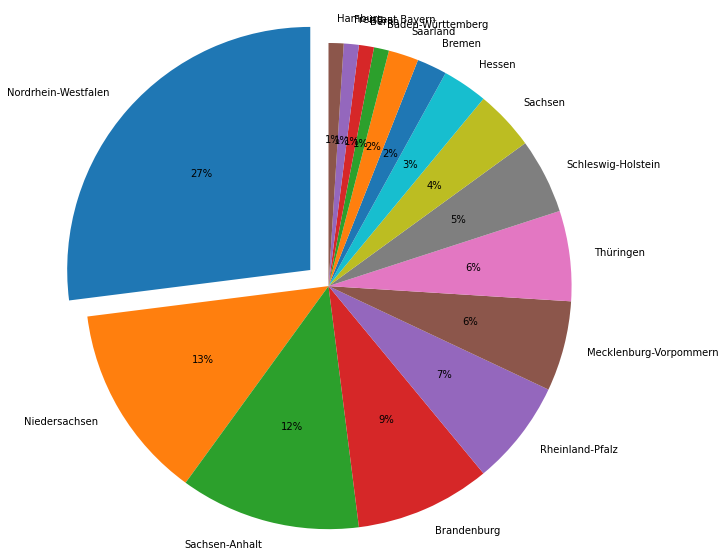

In [96]:
plot_pie(df, date_cols[-1])

In [130]:
n_kreise = pd.DataFrame(df['bundesland'].value_counts())

In [102]:
result_df = pd.merge(result_df, n_kreise, left_index=True, right_index=True)

In [104]:
result_df['%counts'] = result_df['2020-03-31']/result_df['bundesland']

In [105]:
result_df

,2020-03-31,bundesland,%counts
Nordrhein-Westfalen,27,53,0.509434
Niedersachsen,13,45,0.288889
Sachsen-Anhalt,12,14,0.857143
Brandenburg,9,18,0.500000
Rheinland-Pfalz,7,36,0.194444
Mecklenburg-Vorpommern,6,8,0.750000
Thüringen,6,23,0.260870
Schleswig-Holstein,5,15,0.333333
Sachsen,4,13,0.307692
Hessen,3,26,0.115385


In [123]:
def plot_bar(df, x_col, y_col):
    fig, ax = plt.subplots(figsize=(25,10))
    ax.bar(x_col, y_col)
    plt.xticks(rotation=60)
    plt.axhline(y=0.5, alpha=0.3, c='r')
    #return fig

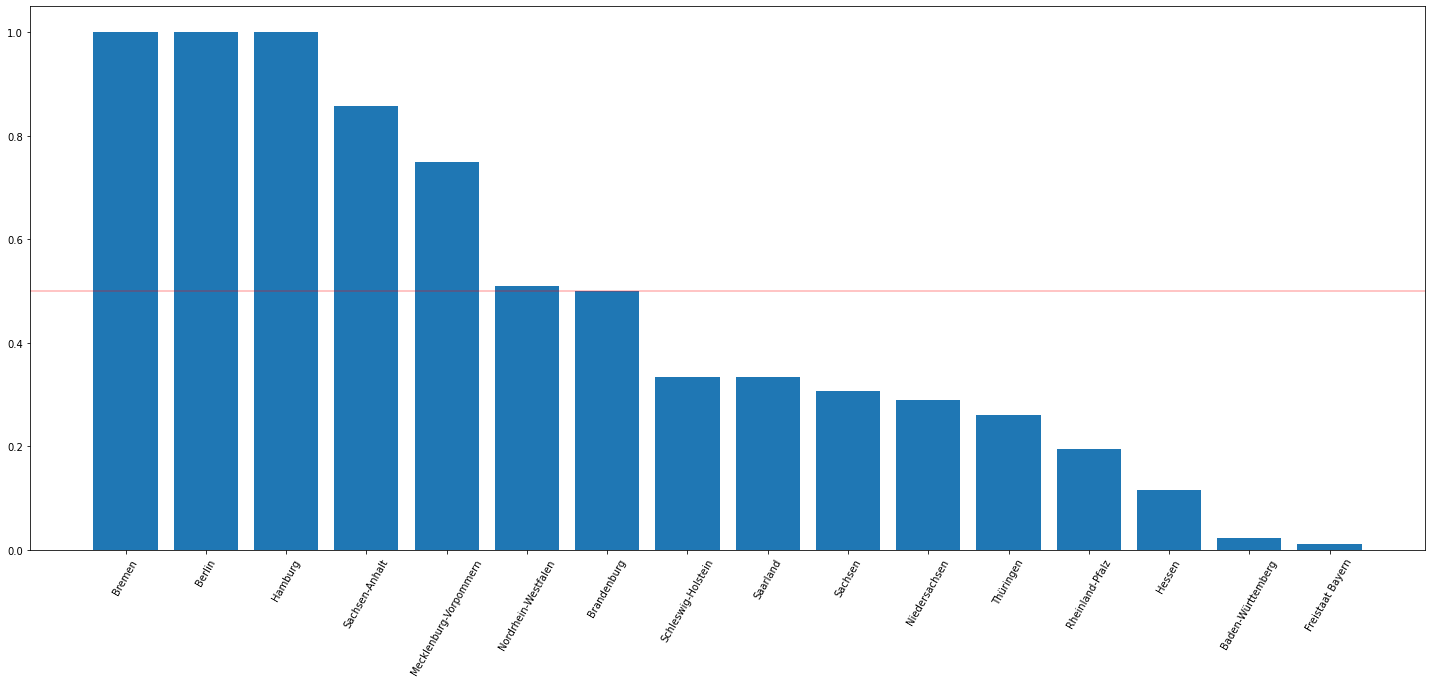

In [124]:
result_df = result_df.sort_values('%counts', ascending=False)
plot_bar(result_df, result_df.index, result_df['%counts'])